In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display main karaoke song dataset in the page.
df = pd.read_csv('karaoke_playlist_tracks_data.csv')
pd.options.display.max_columns = 21
df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name
0,1FHCU1rDAeaPsBW9byjJ0Q,12:51,09DdQEMQaaq0f99vqqub3V,krissy & ericka,5M4GVkxOl3joHIkvNrAlbJ,246280,1/1/11,64,0.503,0.357,3,-9.360,1,0.0272,0.72700,0.000000,0.1280,0.438,136.135,37i9dQZF1DXcfJb5A3855D,Pinoy Karaoke Hits
1,3JvKfv6T31zO0ini8iNItO,Another Love,2txHhyCwHjUEpJjWrEyqyX,Tom Odell,0Gf1yE895FKK4YWVRuAeg8,244360,6/24/13,93,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,37i9dQZF1DXcfJb5A3855D,Pinoy Karaoke Hits
2,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,77SW9BnxLY8rJ0RciFqkHh,The Neighbourhood,4xkM0BwLM9H2IUcbYzpcBI,240400,4/19/13,92,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,37i9dQZF1DXcfJb5A3855D,Pinoy Karaoke Hits
3,3AJwUDP919kvQ9QcozQPxg,Yellow,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,6ZG5lRT77aJ3btmArcykra,266773,7/10/00,90,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,37i9dQZF1DXcfJb5A3855D,Pinoy Karaoke Hits
4,1UI0l2L66HJ9AtoEOlHzv4,Sometimes,26dSoYclwsYLMAKD3tpOr4,Britney Spears,3WNxdumkSMGMJRhEgK80qx,245066,1/12/99,69,0.745,0.742,10,-5.693,1,0.0259,0.42000,0.000000,0.1020,0.806,95.996,37i9dQZF1DXcfJb5A3855D,Pinoy Karaoke Hits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,20NtJsAqfcFhuG5OGe2ZnJ,Me Nace del Corazón,2uyweLa0mvPZH6eRzDddeB,Rocío Dúrcal,1QXxmsxolhkqiFtI1mpX4i,167133,3/5/83,51,0.502,0.460,2,-8.355,1,0.0302,0.53100,0.000000,0.2130,0.933,150.089,2Zq9LpczH6tGkt3URsJNa0,Karaoke México ✌
3349,0bMVCO35RJiUhAfvFsLjIF,Este Corazón,7cjh6y0V9SsyCrWSXTzwOs,RBD,6pBngj1vpWoWV2L2e0XQVF,210440,1/1/05,68,0.497,0.619,7,-4.811,1,0.0322,0.47000,0.000000,0.0708,0.756,159.996,2Zq9LpczH6tGkt3URsJNa0,Karaoke México ✌
3350,4HzqWEdAbzcVFDv0pvxV4w,Sobrio,1r4hJ1h58CWwUQe3MxPuau,Maluma,0R1Ygba9KBj95maQnUvZm5,201180,7/8/21,81,0.762,0.770,5,-2.758,1,0.2230,0.13800,0.000000,0.1500,0.631,177.998,2Zq9LpczH6tGkt3URsJNa0,Karaoke México ✌
3351,5zMgWyXawwhTbCh74tiMxD,El Amor De Su Vida,1bfl0AU8SqmLkElptOprhC,Julión Álvarez y su Norteño Banda,50JOxUvIxX7M3glXWM2Ubi,219373,3/23/15,71,0.676,0.595,8,-5.922,1,0.0284,0.43500,0.000003,0.0949,0.875,100.009,2Zq9LpczH6tGkt3URsJNa0,Karaoke México ✌


In [42]:
# Drop the unecessary columns from dataset.
dfd = df.drop(['track_id','track_name','artist_id','artist_name','album_id','duration', 'release_date','mode','playlist_id','playlist_name'], axis=1)

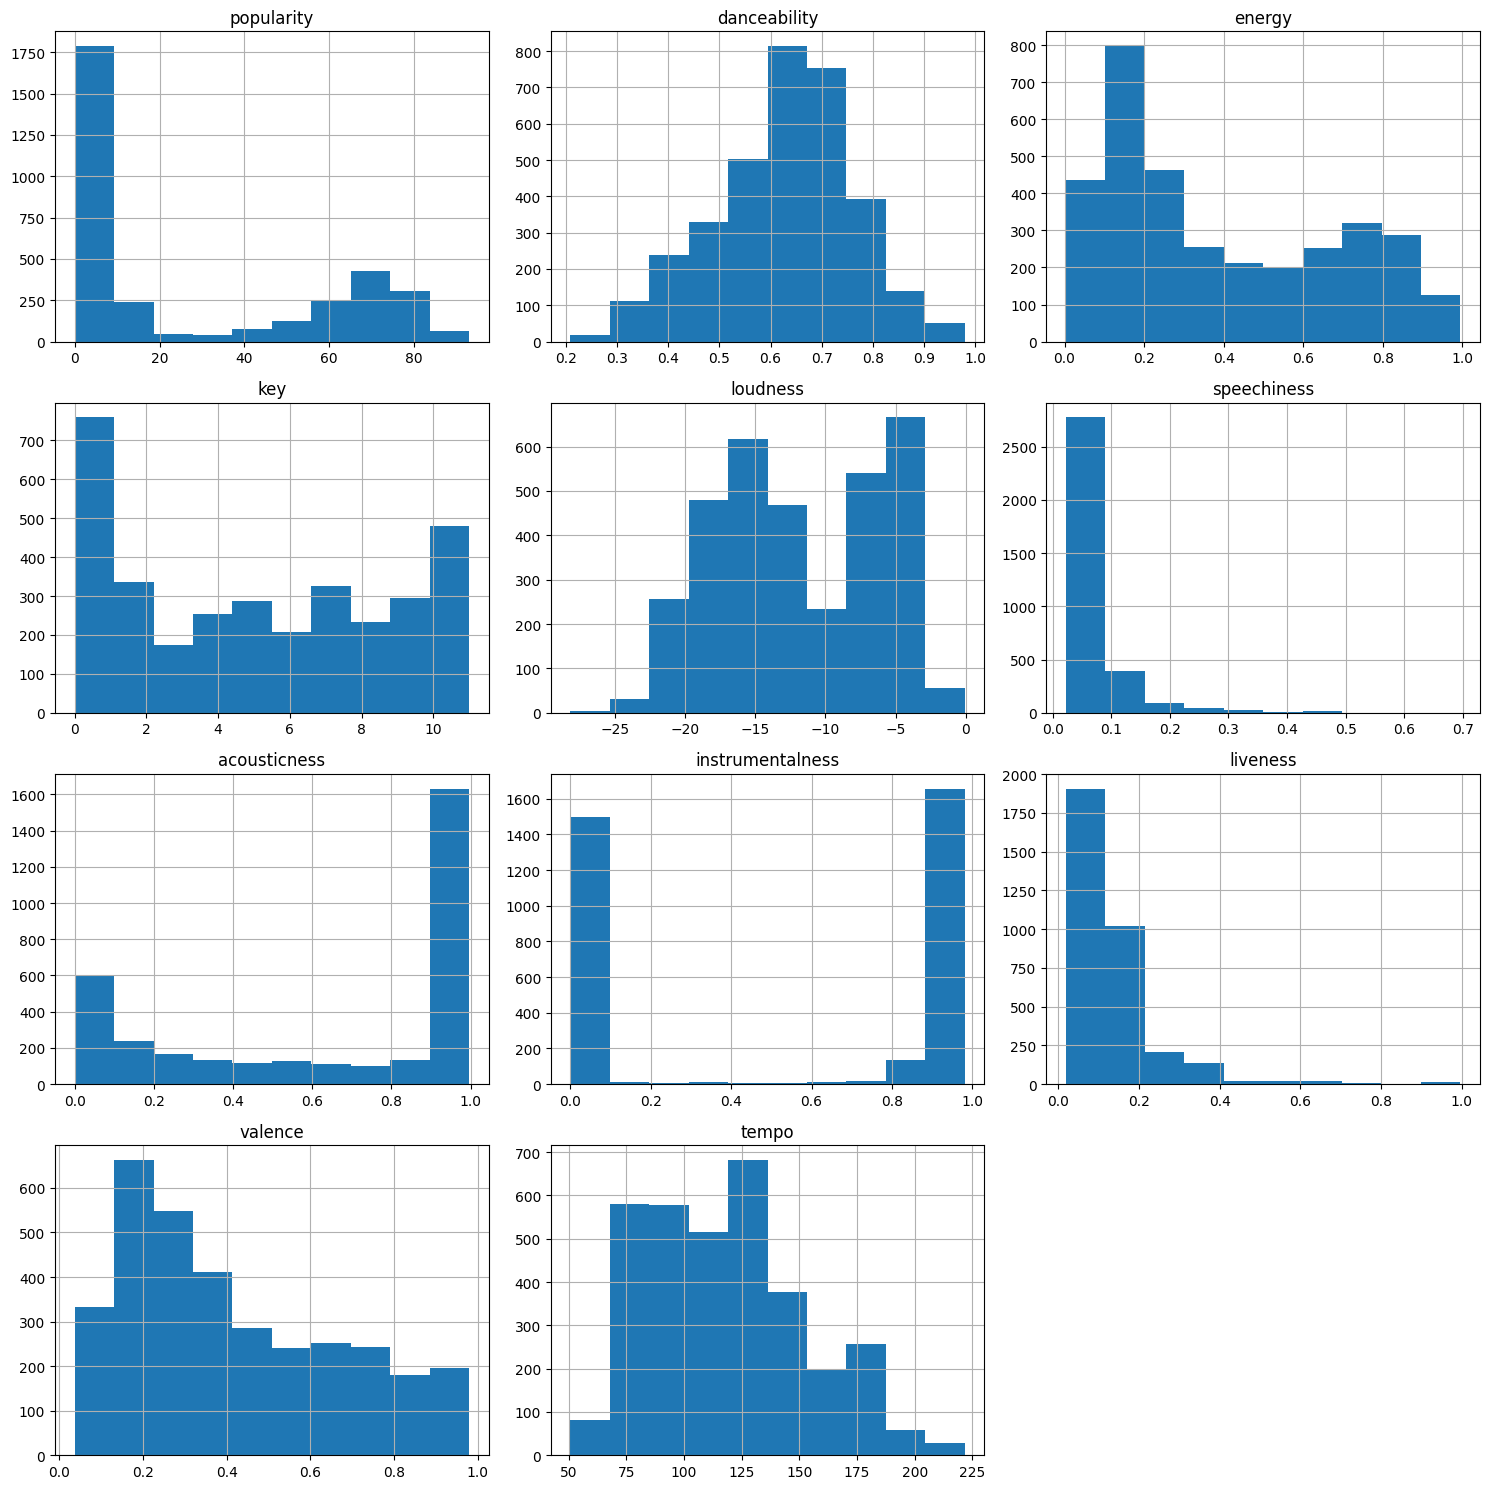

In [43]:
# Draw a histogram plot for visualization of all relative features from the dataset.
dfd.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

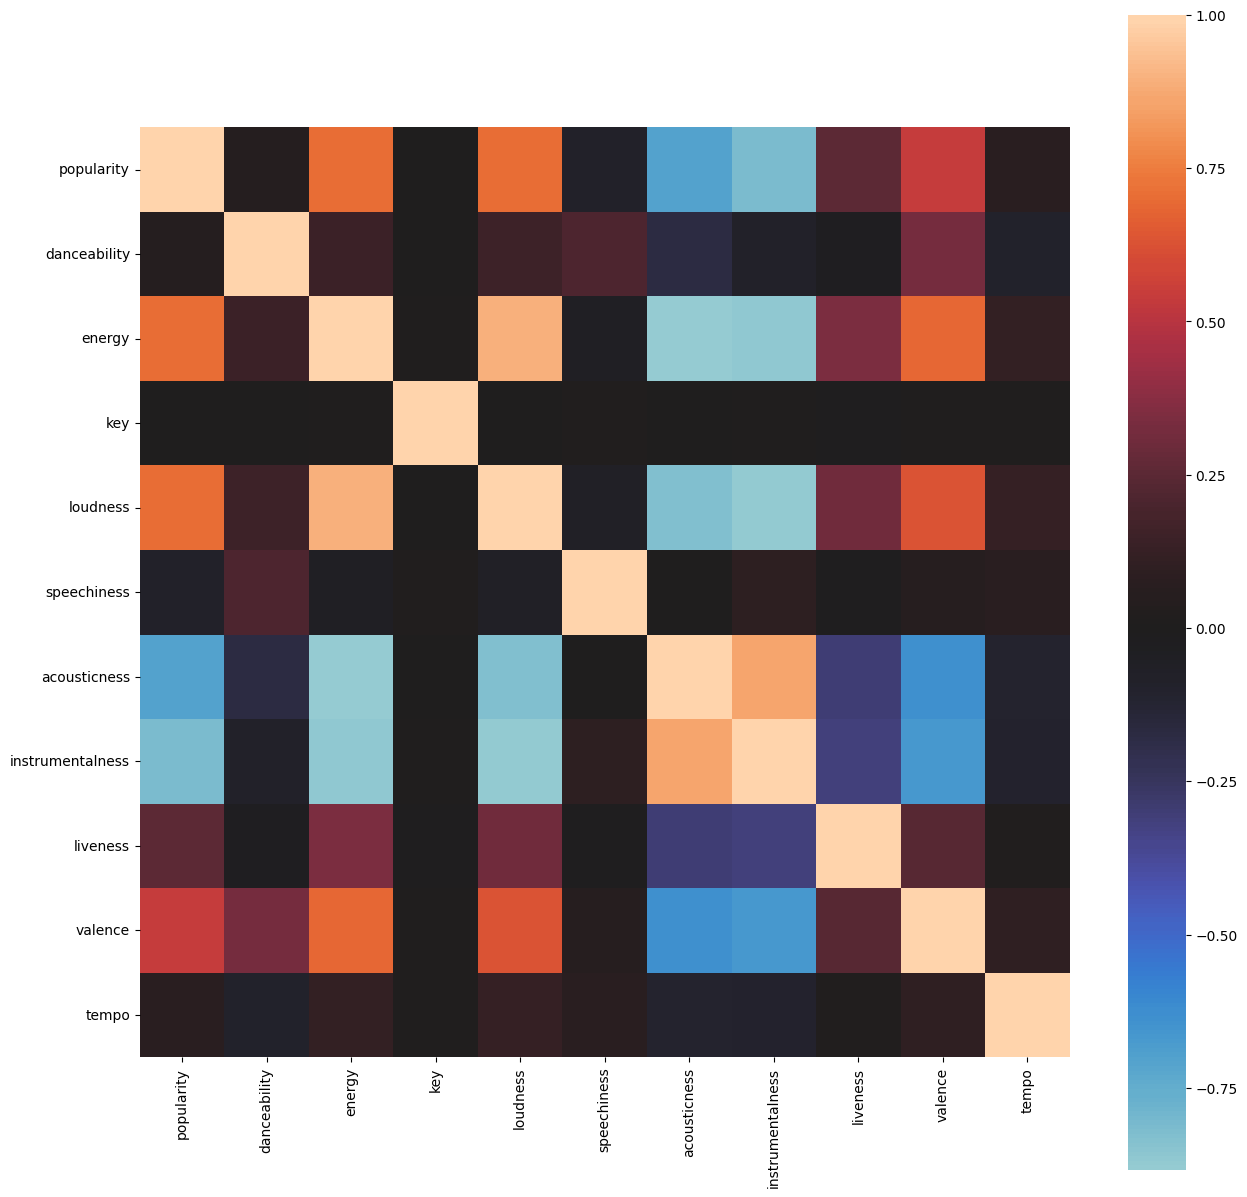

In [44]:
# Draw heatmap for visualization to see the relationship for main features.
plt.gcf().set_size_inches(15,15)
cmap=sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(dfd.corr(), center=0,annot=False, square=True)
plt.show()

In [45]:
# Implement standard scaler for data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model = scaler.fit(dfd)
scaled_data = model.transform(dfd)

In [46]:
data_scaled = pd.DataFrame(scaled_data,columns=['popularity','danceability','energy','key','loudness',
                                               'speechiness','acousticness','instrumental','liveness',
                                               'valence','tempo'])
data_scaled.head()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumental,liveness,valence,tempo
0,0.688172,0.381818,0.356336,0.272727,0.669649,0.006683,0.729913,0.000000,0.111452,0.425873,0.499629
1,1.000000,0.306494,0.537934,0.363636,0.699048,0.025694,0.697783,0.000017,0.077096,0.100074,0.421493
2,0.989247,0.523377,0.810331,0.909091,0.902216,0.016189,0.049674,0.018043,0.083845,0.383424,0.428999
3,0.967742,0.285714,0.663035,1.000000,0.745384,0.008020,0.002374,0.000123,0.219836,0.263504,0.717311
4,0.741935,0.696104,0.744754,0.909091,0.799851,0.004753,0.421672,0.000000,0.084867,0.816407,0.264981


In [47]:
# Use KMeans Clustering (descriptive, unsupvervised method) and begin model training.
from sklearn.cluster import KMeans

# Define clusters and fit model via training with seed #75 for reproducability and consistency with Flask web application.
kmeans = KMeans(n_clusters=15, random_state=75)
kfit = kmeans.fit(data_scaled)

# Predicting the clusters.
pd.options.display.max_columns = 12

# Update the DataFrame. Labels_ is used to identify the Labels of each point.
predictions = kfit.labels_
type(predictions)
data_scaled['clusters'] = predictions
data_scaled.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumental,liveness,valence,tempo,clusters
0,0.688172,0.381818,0.356336,0.272727,0.669649,0.006683,0.729913,0.000000,0.111452,0.425873,0.499629,3
1,1.000000,0.306494,0.537934,0.363636,0.699048,0.025694,0.697783,0.000017,0.077096,0.100074,0.421493,3
2,0.989247,0.523377,0.810331,0.909091,0.902216,0.016189,0.049674,0.018043,0.083845,0.383424,0.428999,4
3,0.967742,0.285714,0.663035,1.000000,0.745384,0.008020,0.002374,0.000123,0.219836,0.263504,0.717311,4
4,0.741935,0.696104,0.744754,0.909091,0.799851,0.004753,0.421672,0.000000,0.084867,0.816407,0.264981,11
5,0.967742,0.327273,0.594431,0.090909,0.826090,0.019159,0.170661,0.000000,0.294479,0.146769,0.488142,5
6,0.956989,0.184416,0.294794,0.363636,0.643055,0.015743,0.937749,0.000000,0.077710,0.088401,0.377737,3
7,0.946237,0.302597,0.613600,0.181818,0.745562,0.132630,0.586335,0.000006,0.358896,0.149952,0.761418,3
8,0.946237,0.601299,0.520783,0.727273,0.726921,0.018714,0.862446,0.000000,0.098160,0.353709,0.405312,3
9,0.698925,0.683117,0.876917,0.909091,0.877965,0.025991,0.025075,0.000003,0.251534,0.582935,0.335278,0


Text(0.5, 1.0, 'HearAndNow Karaoke Song Recommendations')

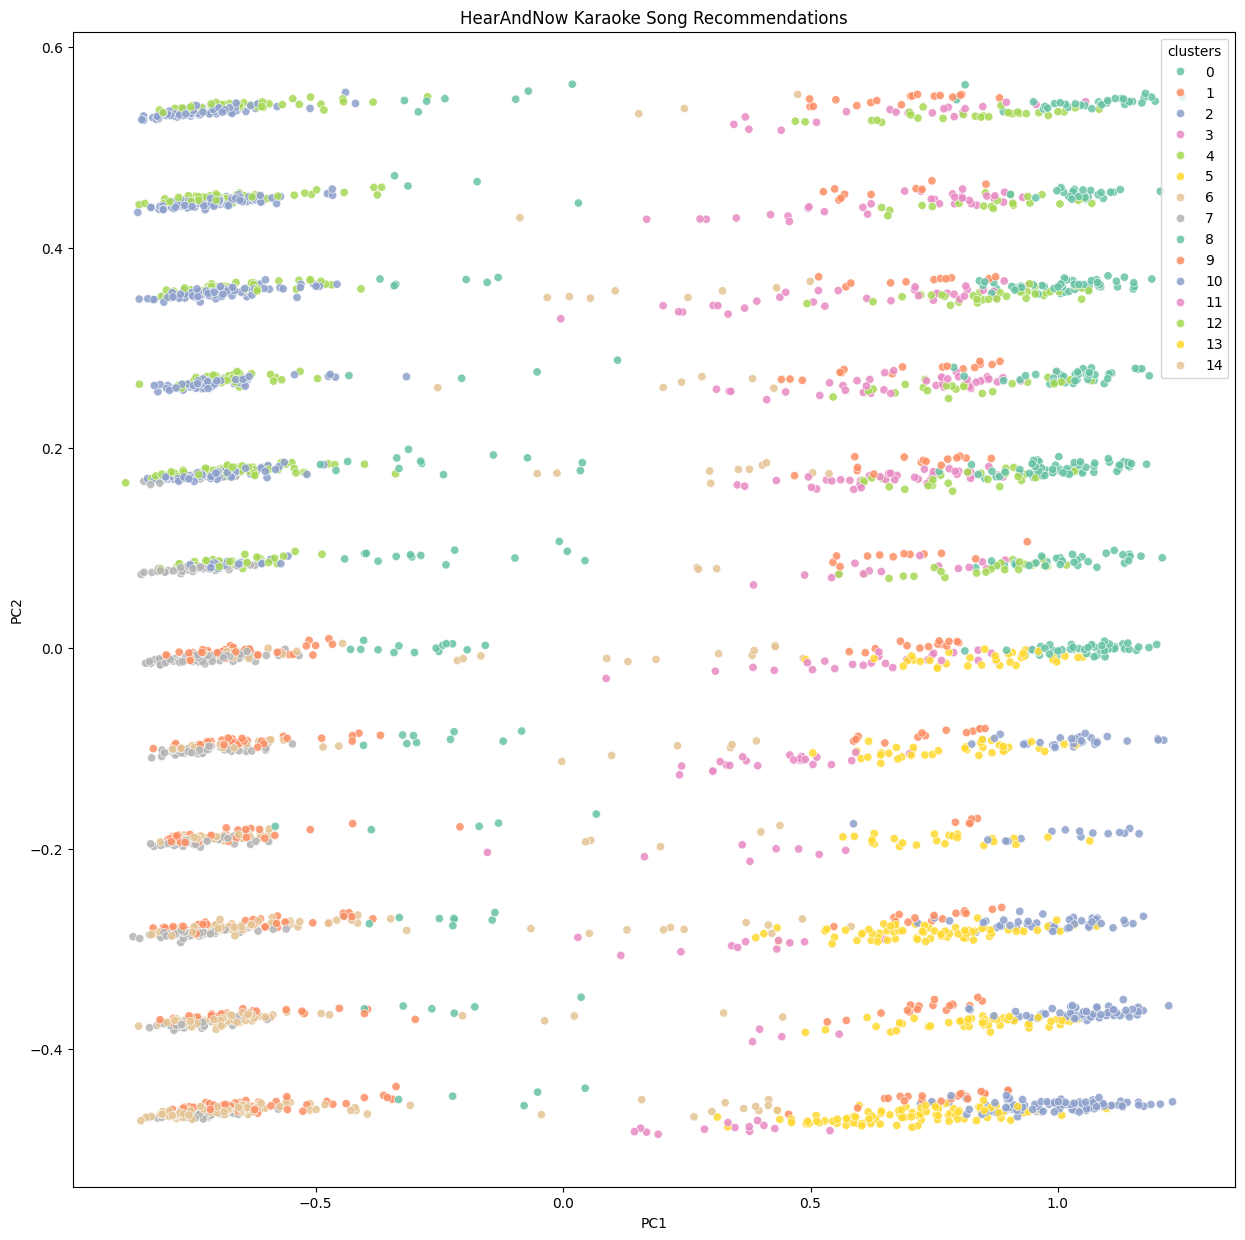

In [48]:
# Use Principal Component Analysis (PCA) visualiztion for dimensionality reduction and to gather results.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.datasets import make_blobs

pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(data_scaled.drop(['clusters'],axis=1)),columns=['PC1','PC2'])
pca_data['clusters'] = predictions

# Analysis of results.
plt.figure(figsize=(15,15))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='clusters', palette='Set2', alpha = 0.85)
plt.title('HearAndNow Karaoke Song Recommendations')

In [49]:
# Print out the songs in each cluster with their attribute/feature scores.
for cluster_number in range(15):
    cluster_songs = data_scaled[data_scaled['clusters'] == cluster_number]
    print(f"Cluster {cluster_number} Songs:")
    print(cluster_songs[['popularity', 'danceability', 'energy', 'key', 'loudness',
                         'speechiness', 'acousticness', 'instrumental', 'liveness',
                         'valence', 'tempo']])
    print("\n")

Cluster 0 Songs:
      popularity  danceability    energy       key  loudness  speechiness  \
9       0.698925      0.683117  0.876917  0.909091  0.877965     0.025991   
12      0.935484      0.671429  0.700363  0.454545  0.854105     0.030299   
16      0.924731      0.606494  0.774011  0.727273  0.871503     0.038022   
20      0.913978      0.914286  0.604520  0.727273  0.828291     0.301946   
21      0.913978      0.640260  0.828491  0.545455  0.867526     0.055547   
...          ...           ...       ...       ...       ...          ...   
3315    0.763441      0.618182  0.862793  0.454545  0.909849     0.048418   
3325    0.698925      0.574026  0.916263  0.636364  0.881196     0.297490   
3327    0.817204      0.750649  0.730630  0.545455  0.879314     0.544037   
3334    0.698925      0.581818  0.903148  0.818182  0.884746     0.011882   
3350    0.870968      0.718182  0.773002  0.454545  0.904062     0.297490   

      acousticness  instrumental  liveness   valence     t

In [50]:
# Merge the original DataFrame with the clustered data to see which songs by which artists are grouped together.
clustered_df = pd.merge(df[['track_name', 'artist_name']], data_scaled[['clusters']], left_index=True, right_index=True)

# Display the songs in each cluster with their names and IDs.
for cluster_number in range(15):
    cluster_songs = clustered_df[clustered_df['clusters'] == cluster_number]
    print(f"Cluster {cluster_number} Songs:")
    print(cluster_songs[['track_name', 'artist_name']])
    print("\n")

Cluster 0 Songs:
                                      track_name      artist_name
9     Everybody (Backstreet's Back) - Radio Edit  Backstreet Boys
12                          Locked out of Heaven       Bruno Mars
16                                     Adore You     Harry Styles
20                                          Lost      Frank Ocean
21                     Levitating (feat. DaBaby)         Dua Lipa
...                                          ...              ...
3315                          La Rompe Corazones     Daddy Yankee
3325                                 Shabadabada              OV7
3327                                       Hawái           Maluma
3334                                 Sentimettal        Moderatto
3350                                      Sobrio           Maluma

[295 rows x 2 columns]


Cluster 1 Songs:
                                             track_name  artist_name
1295  Scared To Be Lonely (Originally Performed By M...   Sing2Piano
1302  Say 